In [51]:
import csv

#pipe with diameter of 24
#radius is 12
#division into 50 bins
#1 bin has width 24/50
#radius = (binIndex-24.5)* 24/50
def transferToRadius(x):
    return ((x-24.5) * 24.0/50.0)

def initFromCSV(csvFile : str):
    global densities, velocities, xValues
    densities = []
    velocities = []
    xValues = []

    csvfile = open(csvFile, newline='')
    #csvfile = open('nanoScaleFlow/flowProfile400000.csv', newline='')
    spamreader = csv.reader(csvfile, delimiter=';', quotechar=' ')

    i=0
    for row in spamreader:
        if i>4 and i <= 50-5:
            binNum = int(row[0])
            velRow = row[2].strip('][').split(',')
            vel = abs(float(velRow[1]))
            density = float(row[1])

            xValues.append(transferToRadius(binNum))
            densities.append(density)
            velocities.append(vel)
            #print(list[1])

        i= i+1

densities = []
velocities = []
xValues = []

initFromCSV('nanoScaleFlow/flowProfile190000.csv')

print(xValues[10])

-5.04


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


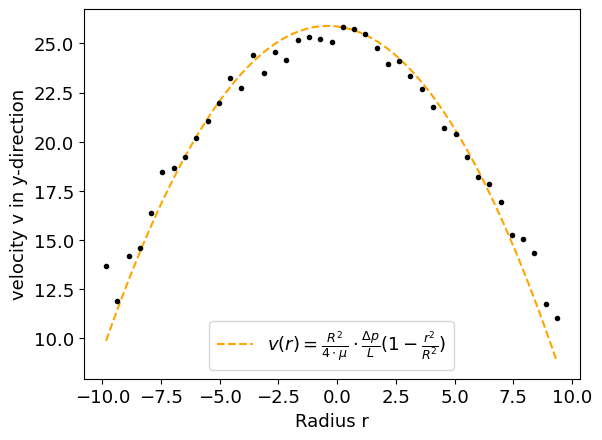

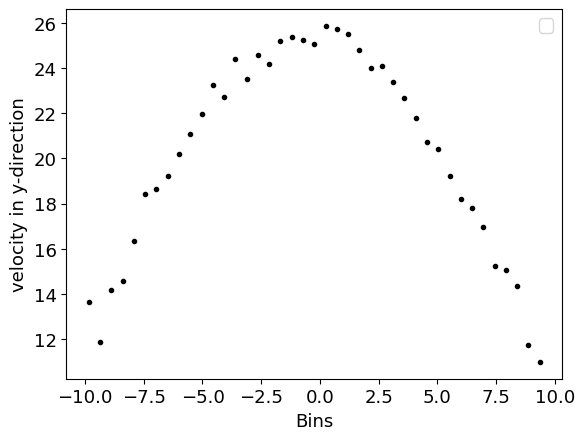

In [52]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import optimize as opt
from scipy import constants
from math import *

plt.rcParams.update({'font.size': 13})

#density plot
# R^2 /4u * (deltaP/L) (1- r^2 / R^2)

def velPipe(r, u, p_div_L, r_off):
    R = 12
    return (12*12/(4*u)) * p_div_L * (1- ((r-r_off)*(r-r_off))/(R*R))


def my_plot_withVelFit(xValues, yValues, filename:str, label:str, x_label : str, y_label : str):
    fig, ax = plt.subplots()

    ax.errorbar(
        xValues,
        yValues,
        #yerr = ,
        marker = '.',
        color ='black',
        markerfacecolor = 'black',
        linestyle = '',
        elinewidth= 0.5,
        capsize = 1.5,
        label=label
    )

    startParameterL = 1,1,1
    poptL, pcovL = opt.curve_fit(
    velPipe,
    xValues,
    yValues,
    p0 = startParameterL
    )
    
    x_fit = np.linspace(min(xValues), max(xValues), 200)
    ax.plot(
    x_fit,
    velPipe(x_fit, *poptL),
    label = r"$v(r) = \frac{R^2}{4\cdot \mu}\cdot \frac{\Delta p}{L}(1 - \frac{r^2}{R^2})$",
    marker = '',
    linestyle = 'dashed',
    markerfacecolor ='orange',
    color = 'orange'
    )

    ax.set_xlabel(xlabel=x_label)
    ax.set_ylabel(ylabel=y_label)

    ax.legend()
    fig.savefig( filename + '.pdf')
    fig.savefig( filename + '.png')

def my_plot(xValues, yValues, filename:str, label:str, x_label : str, y_label : str):
    fig, ax = plt.subplots()

    ax.errorbar(
        xValues,
        yValues,
        #yerr = ,
        marker = '.',
        color ='black',
        markerfacecolor = 'black',
        linestyle = '',
        elinewidth= 0.5,
        capsize = 1.5,
        label=label
    )

    ax.set_xlabel(xlabel=x_label)
    ax.set_ylabel(ylabel=y_label)

    ax.legend()
    fig.savefig( filename + '.pdf')
    fig.savefig( filename + '.png')

#print(velocities)


In [ ]:
initFromCSV('nanoScaleFlow/flowProfile190000.csv')
my_plot_withVelFit(xValues=xValues, yValues=velocities, filename="velocities_nano_Flow_with_plot", label="", x_label="Radius r", y_label="velocity v in y-direction")
my_plot(xValues=xValues, yValues=velocities, filename="velocities_nano_Flow", label="", x_label="Bins", y_label="velocity in y-direction")
my_plot(xValues=xValues, yValues=densities, filename="density_nano_Flow", label="", x_label="Radius", y_label="density")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


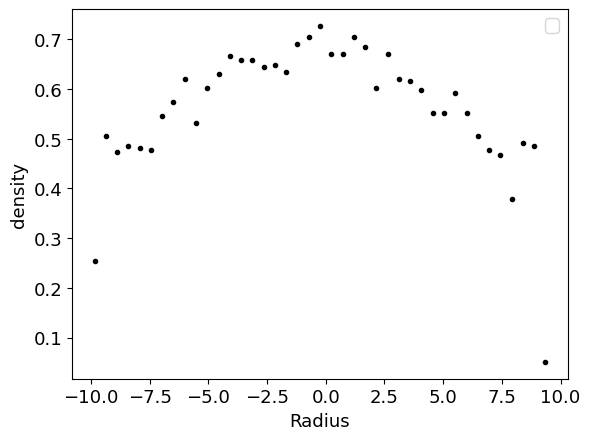

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


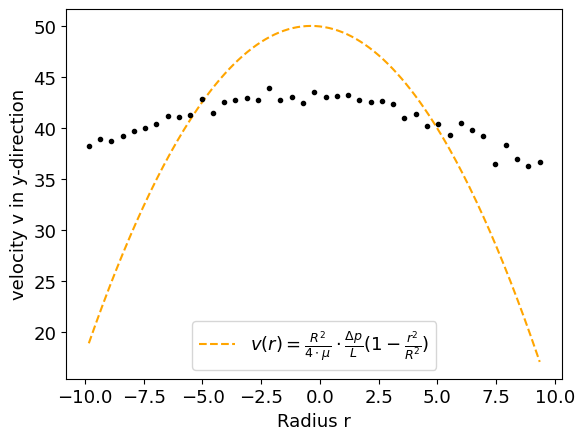

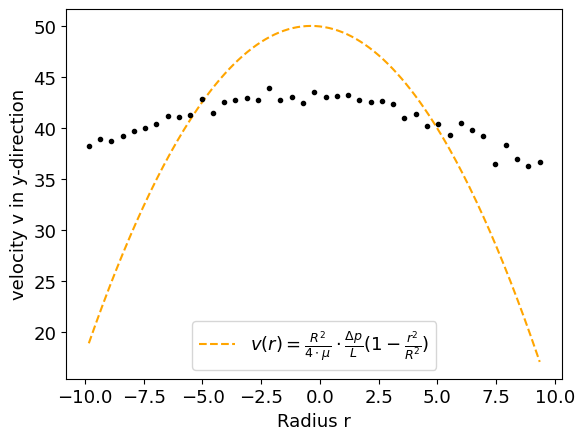

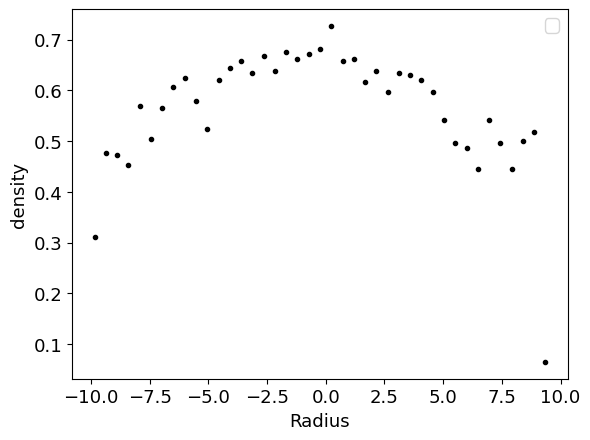

In [54]:
initFromCSV('nanoScaleFlow/flowProfile400000.csv')
my_plot_withVelFit(xValues=xValues, yValues=velocities, filename="nanoFlow400000_with_plot", label="", x_label="Radius r", y_label="velocity v in y-direction")
my_plot_withVelFit(xValues=xValues, yValues=velocities, filename="nanoFlow400000_with_plot", label="", x_label="Radius r", y_label="velocity v in y-direction")
my_plot(xValues=xValues, yValues=densities, filename="densite_nanoFlow400000", label="", x_label="Radius", y_label="density")